In [7]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [19]:
Train = pd.read_csv("train.csv")
x = Train["LotFrontage"]
y = Train["SalePrice"]


/usr/local/lib/python2.7/dist-packages/statsmodels/base/data.py:131: RuntimeWarning: invalid value encountered in reduce
  ptp_ = self.exog.ptp(axis=0)


MissingDataError: exog contains inf or nans

In [9]:
Train = pd.read_csv("train.csv")
Train["Alley"].fillna(Train["Alley"].mode()[0], inplace=True)
Train["MSSubClass"].fillna(Train["MSSubClass"].mode()[0], inplace = True)
Train["MSZoning"].fillna(Train["MSZoning"].mode()[0], inplace = True)
Train["LotFrontage"].fillna(Train["LotFrontage"].mode()[0], inplace = True)
Train["LotArea"].fillna(Train["LotArea"].mode()[0], inplace = True)
#Train["Street"].fillna(Train["Street"].mode()[0], inplace = True)
Train["Street"].fillna(Train["Street"].mode()[0], inplace = True)
Train["SalePrice"].fillna(Train["SalePrice"].mean(), inplace = True)
Train["MoSold"].fillna(Train["MoSold"].mean(), inplace = True)
Train["PoolArea"].fillna(Train["PoolArea"].mode()[0], inplace = True)
Train["YrSold"].fillna(Train["YrSold"].mode()[0], inplace = True)

Train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,60.0,10382,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
y = Train["SalePrice"]
X = np.column_stack((Train["LotFrontage"], Train["LotArea"]))
Y = np.array(y)



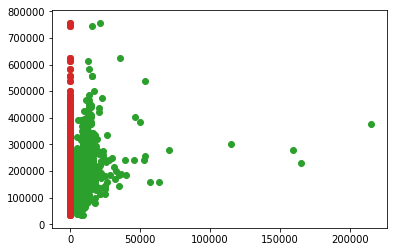

In [11]:
plt.scatter(Train["LotFrontage"], Y)
plt.scatter(Train["MSSubClass"], Y)
plt.scatter(Train["LotArea"], Y)
plt.scatter(Train["MoSold"], Y)

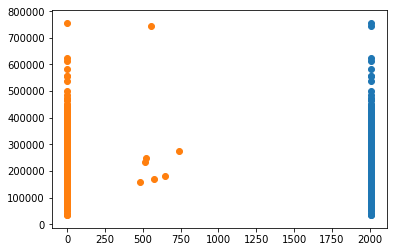

In [12]:
plt.scatter(Train["YrSold"], Y)
plt.scatter(Train["PoolArea"],Y)

In [17]:
regress = LinearRegression() 
kfold = model_selection.KFold(n_splits =10, random_state = 7)
results = model_selection.cross_val_score(regress, X,Y, cv=kfold)

regress.fit(X,Y)
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

print results.mean()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3752.
Date:                Fri, 25 May 2018   Prob (F-statistic):               0.00
Time:                        12:18:35   Log-Likelihood:                -18549.
No. Observations:                1460   AIC:                         3.710e+04
Df Residuals:                    1458   BIC:                         3.711e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2252.6154     43.906     51.306      0.0

In [85]:
Test = pd.read_csv("test.csv")
Test["Alley"].fillna(Test["Alley"].mode()[0], inplace=True)
#Test["MSSubClass"].fillna(Test["MSSubClass"].mode()[0], inplace = True)
Test["MSZoning"].fillna(Test["MSZoning"].mode()[0], inplace = True)
Test["LotFrontage"].fillna(Test["LotFrontage"].mode()[0], inplace = True)
Test["LotArea"].fillna(Test["LotArea"].mode()[0], inplace = True)
#Train["Street"].fillna(Train["Street"].mode()[0], inplace = True)
Test["Street"].fillna(Test["Street"].mode()[0], inplace = True)
#Test["SalePrice"].fillna(Test["SalePrice"].mean(), inplace = True)
Test["MoSold"].fillna(Test["MoSold"].mean(), inplace = True)
Test["PoolArea"].fillna(Test["PoolArea"].mode()[0], inplace = True)
Test["YrSold"].fillna(Test["YrSold"].mode()[0], inplace = True)
Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,60.0,7980,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [92]:
#xt1 =Test["MSSubClass"]
xt2 = Test["LotFrontage"]
xt3 = Test["LotArea"]
xt4 = Test["MoSold"]
xt5 = Test["PoolArea"]
xt6 = Test["YrSold"]
xt = np.column_stack((xt2,xt3))

In [93]:
y =regress.predict(xt)

In [98]:
Hid = Test["Id"]
d = {"Id": Hid, "SalePrice":y }
df = pd.DataFrame(data = d)

In [100]:
df.to_csv('submission.csv', index = False)